In [2]:
import pandas as pd
from typing import Tuple, List, Dict
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Preprocess Data

In [3]:
df_train = pd.read_csv('./Train_samsung.csv')
df_test = pd.read_csv("./Test_samsung_noclass.csv")
df_train.dtypes

X1        object
X2        object
X3        object
X4        object
X5        object
X6         int64
X7       float64
X8       float64
X9       float64
X10      float64
X11       object
Class     object
dtype: object

In [4]:
def print_df(dataframe: pd.DataFrame):
    print(tabulate(dataframe, headers='keys', tablefmt='psql'))

In [5]:
print_df(dataframe=df_train)

+-----+--------+------+------+--------------+------+-------+----------+------+------+-------+-----------+---------+
|     | X1     | X2   | X3   | X4           | X5   |    X6 |       X7 |   X8 |   X9 |   X10 | X11       | Class   |
|-----+--------+------+------+--------------+------+-------+----------+------+------+-------+-----------+---------|
|   0 | Male   | Yes  | 0    | Graduate     | No   |  6000 |  2250    |  265 |  360 |   nan | Semiurban | N       |
|   1 | Male   | Yes  | 0    | Graduate     | No   |  2958 |  2900    |  131 |  360 |     1 | Semiurban | Y       |
|   2 | Male   | Yes  | 2    | Graduate     | No   |  6250 |  1695    |  210 |  360 |     1 | Semiurban | Y       |
|   3 | Male   | Yes  | 0    | Graduate     | No   |  2083 |  3150    |  128 |  360 |     1 | Semiurban | Y       |
|   4 | Male   | No   | 0    | Graduate     | No   |  4166 |     0    |   98 |  360 |     0 | Semiurban | N       |
|   5 | Male   | Yes  | 0    | Graduate     | No   | 19730 |  5266    | 

### Check missing values

In [6]:
def check_Nan_values(df: pd.DataFrame):
    for key in df.keys():
        if df[key].isnull().sum() > 0:
            print(key, df[key].isnull().sum())

### Continous object data

In [7]:
def numberic(dataframe: pd.DataFrame):
    df = dataframe.copy()
    for key in df.keys():
        if df[key].dtype == object:
            df[key] = LabelEncoder().fit_transform(df[key])

    return df

### Normalize data 

In [8]:
def normalize(dataframe: pd.DataFrame):
    df = dataframe.copy()
    for key in df.keys():
        if df[key].dtype != object:
            min = df[key].min()
            max = df[key].max()
            df[key] = (df[key] - min)/(max-min)
            df[key] = df[key].round(decimals=4)
    return df

### Call check missing values function

In [9]:
check_Nan_values(df = df_train)

X1 12
X2 1
X3 11
X5 24
X8 16
X9 12
X10 40


### Call normalize function

In [10]:
df_train = normalize(dataframe = df_train)

### Call continous data function

In [16]:
df_train = numberic(dataframe = df_train)
print_df(dataframe = df_train)

+-----+------+------+------+------+------+--------+--------+----------+----------+-------+-------+---------+
|     |   X1 |   X2 |   X3 |   X4 |   X5 |     X6 |     X7 |       X8 |       X9 |   X10 |   X11 |   Class |
|-----+------+------+------+------+------+--------+--------+----------+----------+-------+-------+---------|
|   0 |    1 |    1 |    0 |    0 |    0 | 0.0724 | 0.054  |   0.3631 |   0.7436 |   nan |     1 |       0 |
|   1 |    1 |    1 |    0 |    0 |    0 | 0.0347 | 0.0696 |   0.1669 |   0.7436 |     1 |     1 |       1 |
|   2 |    1 |    1 |    2 |    0 |    0 | 0.0754 | 0.0407 |   0.2826 |   0.7436 |     1 |     1 |       1 |
|   3 |    1 |    1 |    0 |    0 |    0 | 0.0239 | 0.0756 |   0.1625 |   0.7436 |     1 |     1 |       1 |
|   4 |    1 |    0 |    0 |    0 |    0 | 0.0497 | 0      |   0.1186 |   0.7436 |     0 |     1 |       0 |
|   5 |    1 |    1 |    0 |    0 |    0 | 0.2422 | 0.1264 |   0.8097 |   0.7436 |     1 |     0 |       0 |
|   6 |    1 |    1

In [18]:
data_train = df_train.copy()

### Find the best method to fill missing non-object data

In [19]:
for key in data_train.keys():
    display(data_train[key].agg(['mean', 'median', 'std'], axis='rows'))

mean      0.835031
median    1.000000
std       0.432453
Name: X1, dtype: float64

mean      0.637475
median    1.000000
std       0.485442
Name: X2, dtype: float64

mean      0.818737
median    0.000000
std       1.112882
Name: X3, dtype: float64

mean      0.221996
median    0.000000
std       0.416012
Name: X4, dtype: float64

mean      0.234216
median    0.000000
std       0.526957
Name: X5, dtype: float64

mean      0.066207
median    0.046400
std       0.073383
Name: X6, dtype: float64

mean      0.040236
median    0.027000
std       0.076263
Name: X7, dtype: float64

mean      0.192859
median    0.164000
std       0.128434
Name: X8, dtype: float64

mean      0.701473
median    0.743600
std       0.144674
Name: X9, dtype: float64

mean      0.844789
median    1.000000
std       0.362507
Name: X10, dtype: float64

mean      1.03666
median    1.00000
std       0.78160
Name: X11, dtype: float64

mean      0.696538
median    1.000000
std       0.460222
Name: Class, dtype: float64

### Handle non-object missing data

In [27]:
def replace_Nan_data(dataframe: pd.DataFrame) :
    df = dataframe.copy()
    for key in df.keys():
        if df[key].isnull().sum() > 0:
            df[key].fillna(round(df[key].median()), inplace=True)
    return df

### Call handle non-object missing data

In [28]:
data_train = replace_Nan_data(dataframe = data_train)
print_df(dataframe = data_train)

+-----+------+------+------+------+------+--------+--------+--------+--------+-------+-------+---------+
|     |   X1 |   X2 |   X3 |   X4 |   X5 |     X6 |     X7 |     X8 |     X9 |   X10 |   X11 |   Class |
|-----+------+------+------+------+------+--------+--------+--------+--------+-------+-------+---------|
|   0 |    1 |    1 |    0 |    0 |    0 | 0.0724 | 0.054  | 0.3631 | 0.7436 |     1 |     1 |       0 |
|   1 |    1 |    1 |    0 |    0 |    0 | 0.0347 | 0.0696 | 0.1669 | 0.7436 |     1 |     1 |       1 |
|   2 |    1 |    1 |    2 |    0 |    0 | 0.0754 | 0.0407 | 0.2826 | 0.7436 |     1 |     1 |       1 |
|   3 |    1 |    1 |    0 |    0 |    0 | 0.0239 | 0.0756 | 0.1625 | 0.7436 |     1 |     1 |       1 |
|   4 |    1 |    0 |    0 |    0 |    0 | 0.0497 | 0      | 0.1186 | 0.7436 |     0 |     1 |       0 |
|   5 |    1 |    1 |    0 |    0 |    0 | 0.2422 | 0.1264 | 0.8097 | 0.7436 |     1 |     0 |       0 |
|   6 |    1 |    1 |    3 |    1 |    1 | 0.0394 | 0.0

In [29]:
data_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.00000,491.000000
mean,0.835031,0.637475,0.818737,0.221996,0.234216,0.066207,0.040236,0.186574,0.708769,0.857434,1.03666,0.696538
std,0.432453,0.485442,1.112882,0.416012,0.526957,0.073383,0.076263,0.130888,0.150157,0.349986,0.78160,0.460222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.034250,0.000000,0.121500,0.743600,1.000000,0.00000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.046400,0.027000,0.162500,0.743600,1.000000,1.00000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,0.071600,0.056000,0.216700,0.743600,1.000000,2.00000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000


In [30]:
check_Nan_values(data_train)

### Heat map 

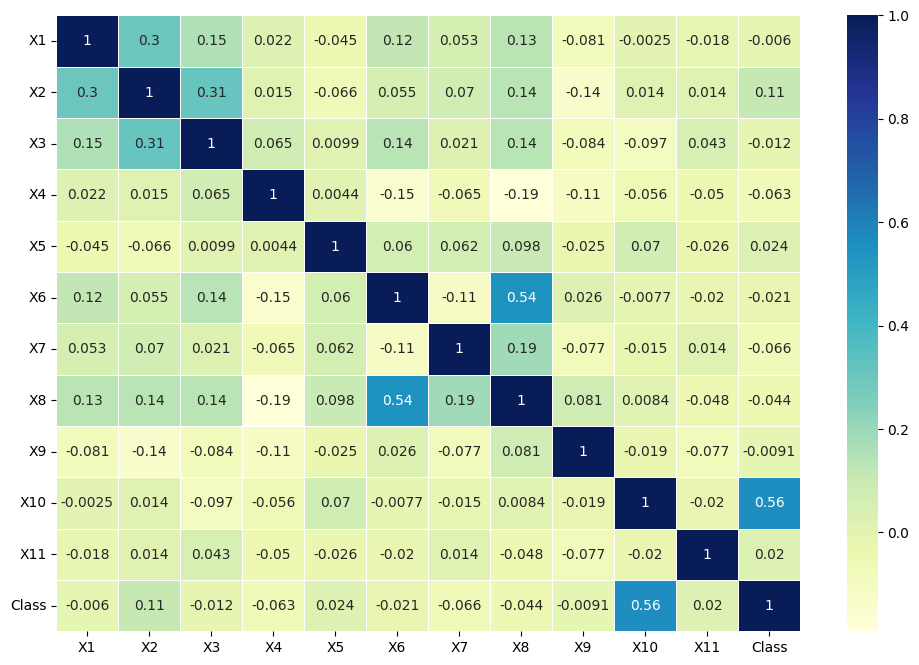

In [36]:
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu',
            linewidths = 0.5)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

# Classification

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

In [38]:
labels_train = data_train['Class']
data_train = data_train.drop(['Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    np.array(data_train), np.array(labels_train), test_size = 0.2, random_state = 29)

              precision    recall  f1-score   support

           0       0.75      0.44      0.56        27
           1       0.82      0.94      0.88        72

    accuracy                           0.81        99
   macro avg       0.78      0.69      0.72        99
weighted avg       0.80      0.81      0.79        99

F1 Accuracy : 87.74 %


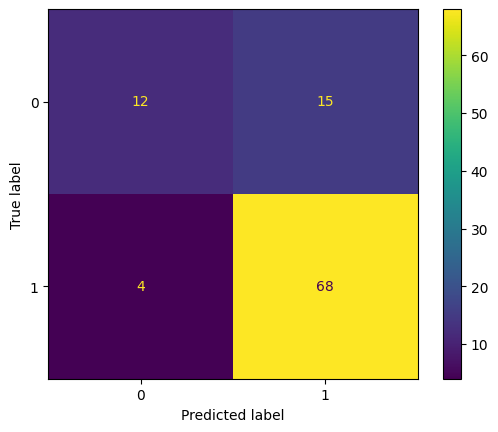

In [70]:
model = LogisticRegression(C = 0.1, max_iter = 100000)
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
DF = pd.DataFrame(model_pred)
DF.to_csv("Class.csv")

#-----------------------------------------------------------------#

print(classification_report(y_test, model_pred))
cm = confusion_matrix(y_true = y_test, y_pred = model_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
f1_accuracy = f1_score(model_pred, y_test)
print("F1 Accuracy : {} %".format("{:.2f}".format(f1_accuracy * 100)))